In [1]:
import itertools
import igraph as ig
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import seaborn as sns
%matplotlib inline

In [2]:
def add_clique(g, clique = 0, clique_size = 5):
    vertex_names = [f'clique-{clique}-vertex-{v}' for v in range(clique_size)]
    for name in vertex_names:
        g.add_vertex(name)
    for u, v in itertools.combinations(vertex_names, r=2):
        g.add_edge(u, v)
    return vertex_names


def two_clique_graph():
    g = ig.Graph()
    clique0vertices = add_clique(g, 0, 5)
    clique1vertices = add_clique(g, 1, 5)
    g.add_edge(np.random.choice(clique0vertices), np.random.choice(clique1vertices))
    return g
    
    
def five_clique_graph():
    g = ig.Graph()
    clique_vertices = [add_clique(g, clique, 5) for clique in range(5)]
    for clique in range(4):
        g.add_edge(np.random.choice(clique_vertices[clique]), np.random.choice(clique_vertices[clique + 1]))
    return g

In [3]:
g = two_clique_graph()
# g = five_clique_graph()

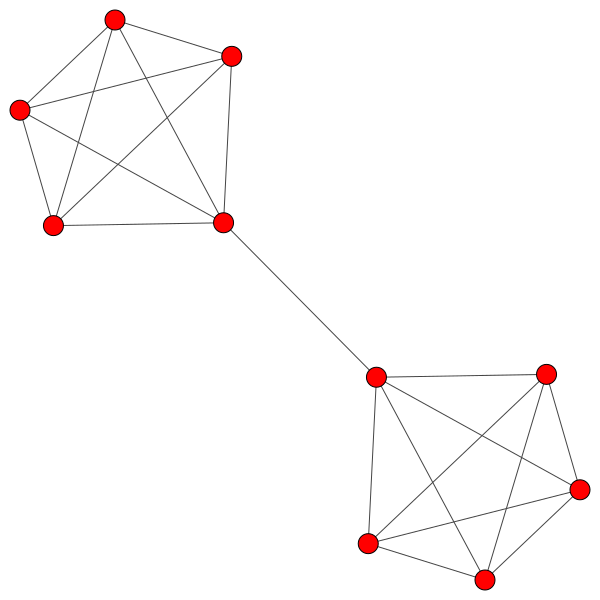

In [4]:
layout = g.layout_auto()
ig.plot(g, layout = layout)

## Graph Laplacian

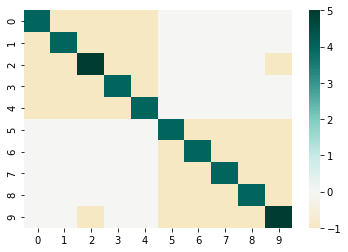

In [5]:
L = g.laplacian()
fig, ax = plt.subplots()
ax = sns.heatmap(L, ax=ax, center=0, cmap='BrBG')

## Spectral analysis

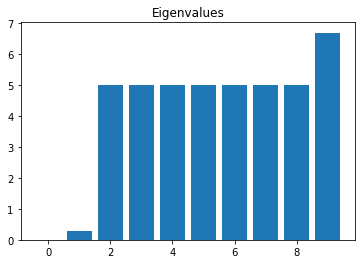

In [6]:
w, v = la.eigh(L)
fig, ax = plt.subplots()
ax.bar(np.arange(len(L)), w)
_ = ax.set_title('Eigenvalues')

In [7]:
vmax = np.abs(v).max()
cmap = cm.get_cmap('BrBG')

In [8]:
def set_evec_colors(g, v):
    scaled_evec = (v / vmax + 1) / 2
    g.vs['color'] = list(map(colors.rgb2hex, cmap(scaled_evec)))

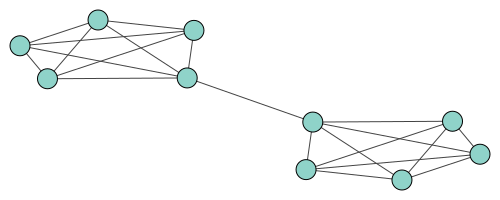

In [9]:
set_evec_colors(g, v[:, 0])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

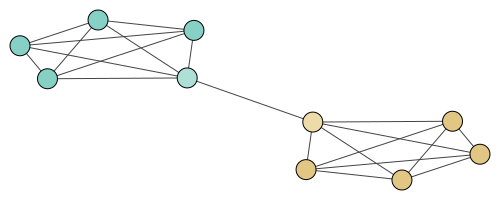

In [10]:
set_evec_colors(g, v[:, 1])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

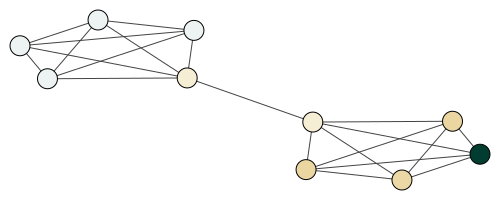

In [11]:
set_evec_colors(g, v[:, 2])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

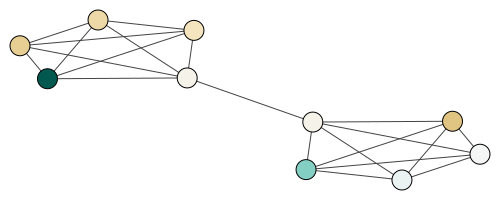

In [12]:
set_evec_colors(g, v[:, 3])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

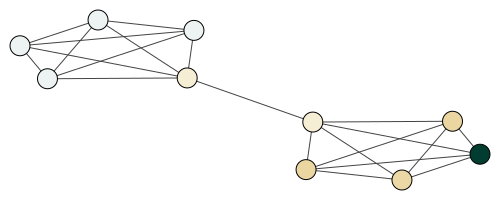

In [13]:
set_evec_colors(g, v[:, 2])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

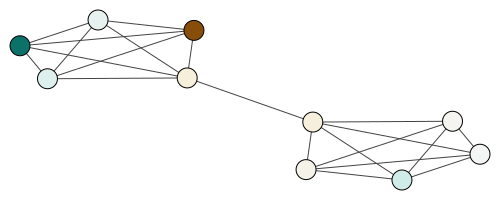

In [14]:
set_evec_colors(g, v[:, 4])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

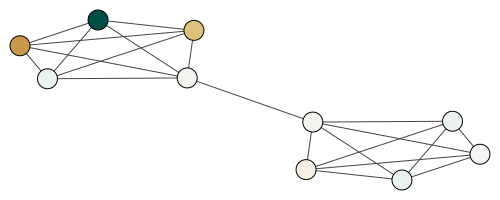

In [15]:
set_evec_colors(g, v[:, 5])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))

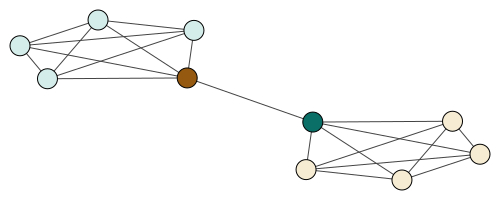

In [16]:
set_evec_colors(g, v[:, 9])
ig.plot(g, layout = layout, bbox=(0, 0, 500, 200))